<a href="https://colab.research.google.com/github/shukurullo2004/Machine-learnings/blob/main/TensFlow_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN da 88% acc, CNN 91% acc
*model architecture differ from last pytorch fashion-mnist it was 89% on both NN and CNN*

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets,models,layers

In [2]:
(training_image, training_label), (testing_image, testing_label) = datasets.fashion_mnist.load_data()

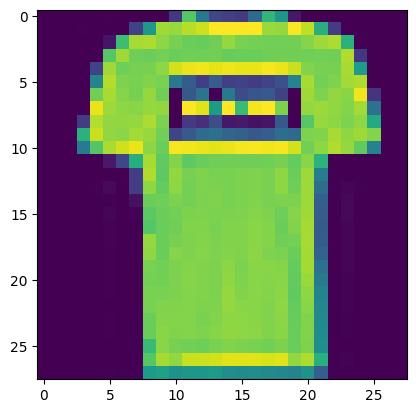

In [3]:
plt.imshow(training_image[1])

In [4]:
training_image = training_image.reshape(60000, 28, 28, 1)
testing_image = testing_image.reshape(10000,28,28,1)
training_image , testing_image  = training_image /255.0, testing_image /255.0

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units =128),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 10)
])

In [6]:
model.compile(optimizer = 'Adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics='accuracy')


In [7]:
history = model.fit(training_image, training_label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4877 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3709 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8748
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3177 - accuracy: 0.8823
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.8882
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2859 - accuracy: 0.8935
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2741 - accuracy: 0.8975
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9002
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2562 - accuracy: 0.9039
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.249

In [8]:
test_loss, test_acc = model.evaluate(testing_image, testing_label, verbose=2)
test_acc

313/313 - 1s - loss: 0.3633 - accuracy: 0.8781 - 702ms/epoch - 2ms/step


0.8780999779701233

In [9]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction = prediction_model.predict(testing_image)


313/313 [==============================] - 1s 2ms/step


In [10]:
pred_label = np.argmax(prediction[9])
pred_label



7

In [11]:
testing_label[9]

7

TO"GRI NATIJA

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
class_names[7]

'Sneaker'

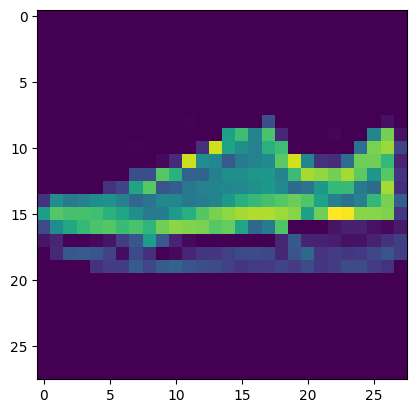

In [14]:
plt.imshow(testing_image[9])

In [15]:
def plot_loss_curve(history):
  acc = history.history["acc"]

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

<Axes: >

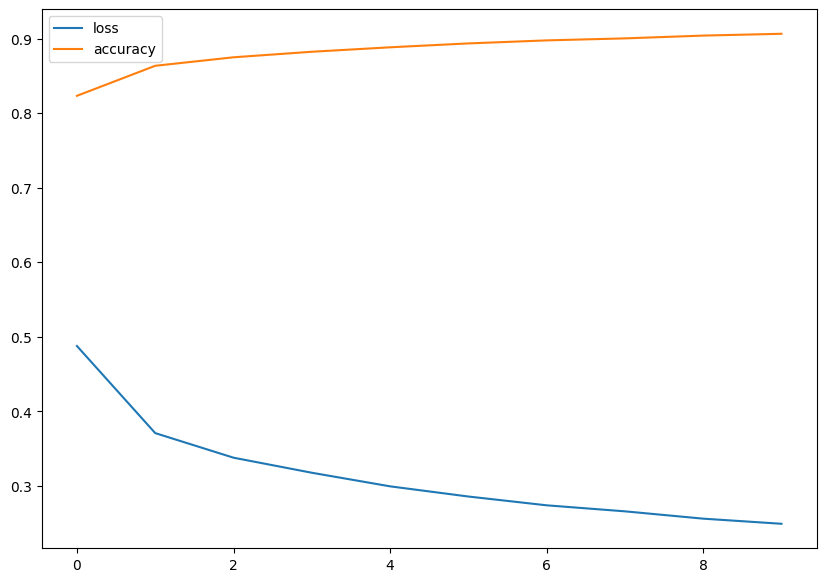

In [17]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize= (10,7))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Activation, Dense
from tensorflow.keras.optimizers import Adam

In [19]:
training_image.shape

(60000, 28, 28, 1)

In [20]:
model_1 = Sequential([
    Conv2D(filters=10,
           input_shape=(28, 28, 1),
           kernel_size=3,
           strides=1,
           padding='same',
           activation='relu'),
    MaxPooling2D(pool_size = 1),

    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(2),

    Conv2D(10, 3, activation = 'relu'),
    MaxPooling2D(2),

    Flatten(),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 10)
])

In [23]:
model_1.compile(optimizer = 'Adam',
                metrics = 'accuracy',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 10)         

In [24]:
history_1 = model_1.fit(x = training_image,
            y = training_label,
            epochs =10,
            validation_data = (testing_image, testing_label)
            )

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.5178 - accuracy: 0.8106 - val_loss: 0.3955 - val_accuracy: 0.8538
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3421 - accuracy: 0.8730 - val_loss: 0.3237 - val_accuracy: 0.8811
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2999 - accuracy: 0.8880 - val_loss: 0.3235 - val_accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2721 - accuracy: 0.8979 - val_loss: 0.2815 - val_accuracy: 0.8978
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2522 - accuracy: 0.9058 - val_loss: 0.2706 - val_accuracy: 0.8992
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2339 - accuracy: 0.9131 - val_loss: 0.2700 - val_accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2228 - accuracy: 0.9162 - val_loss: 0.2694 - val_accuracy

In [25]:
test_loss, test_acc = model_1.evaluate(x = testing_image, y = testing_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.9096


<Axes: >

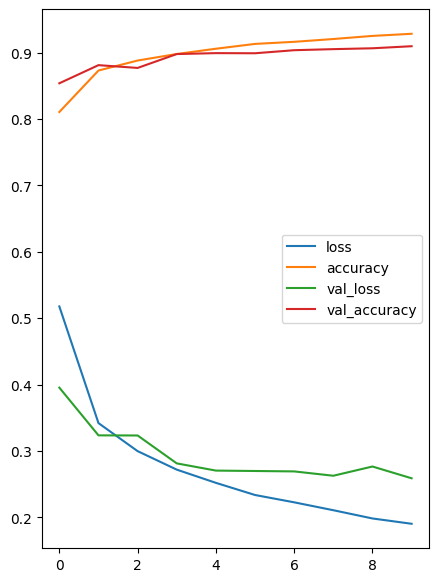

In [29]:
pd.DataFrame(history_1.history).plot(figsize = (5,7))

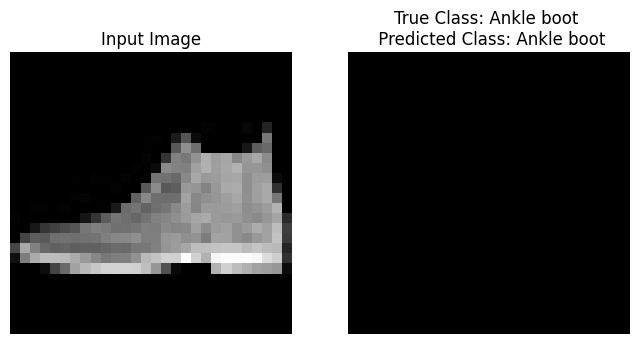

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

def pred_prob(model, classes, test_img, true_img):
    # Ensure the input image has the correct shape and type
    test_img = tf.image.resize(test_img, (28, 28))  # Resize the image if needed
    test_img = tf.expand_dims(test_img, axis=0)  # Add batch dimension
    test_img = tf.cast(test_img, dtype=tf.float32)  # Ensure data type is float32

    # Get model predictions
    logit = model(test_img)
    predictions = tf.nn.softmax(logit)
    prediction_class = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class_name = classes[prediction_class]

    # Display the target image and prediction
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    # Assuming grayscale image, adjust cmap if using RGB
    plt.imshow(test_img[0].numpy().squeeze(), cmap='gray')
    plt.title("Input Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    # Assuming true_img is a scalar representing the class index
    true_img_array = np.zeros((28, 28))
    plt.imshow(true_img_array, cmap='gray')
    plt.title(f"True Class: {classes[int(true_img)]} \n Predicted Class: {predicted_class_name}")
    plt.axis('off')

    plt.show()

# Example usage
pred_prob(model_1, class_names, testing_image[0], testing_label[0])
